## 탐색적 데이터 분석(EDA)

### 1. 연산자(Operator)

In [1]:
# 1.1 산술연산자
# +, -, 
3 + 4

7

In [1]:
import pandas as pd
import numpy as np

In [3]:
# !pip install openpyxl

In [3]:
df = pd.read_excel(io='D:/Document/python_practice/diamonds.xlsx', sheet_name='data', header=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
cancer = pd.read_csv('cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 7. EDA()

In [6]:
diamonds = pd.read_excel(io='D:/Document/python_practice/diamonds.xlsx', sheet_name='data', header=0)
diamonds.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# 백분율 0~100
# data['범주형 데이터'].value_counts(normalize=True)*100

diamonds['cut'].value_counts(normalize=True)*100

cut
Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: proportion, dtype: float64

In [8]:
round(diamonds['cut'].value_counts(normalize=True)*100, ndigits=2)

cut
Ideal        39.95
Premium      25.57
Very Good    22.40
Good          9.10
Fair          2.98
Name: proportion, dtype: float64

In [9]:
# 데이터 시각화
# 막대 그래프(Bar plot, Bar Chart)
# seaborn.countplot(data= , x = '범주형 데이터')
# matplotib.pyplot.show() : 그래프 그리기 끝

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

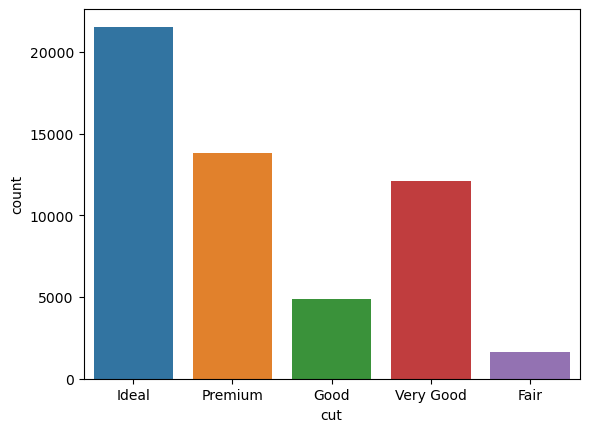

In [11]:
sns.countplot(data=diamonds, x="cut")
plt.show()

In [12]:
# seaborn.barplot(x = '범주 이름', values=빈도 및 백분율)

result = diamonds['cut'].value_counts(normalize=True)*100
print(result.index)
print(result.values)

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object', name='cut')
[39.95365221 25.567297   22.39896181  9.09529106  2.98479792]


<Axes: xlabel='cut'>

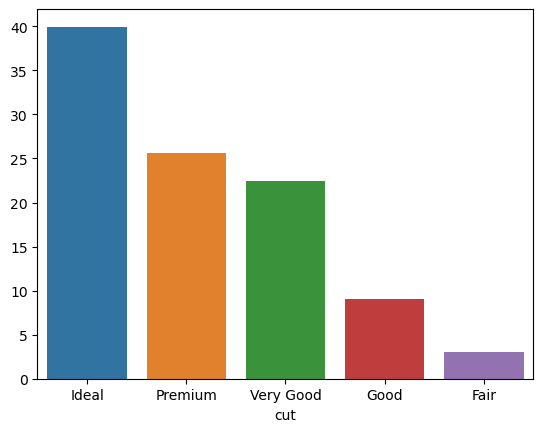

In [13]:
sns.barplot(x = result.index, y = result.values)

- 1단계 : 최소값 , 최대값

새로운 열의이름 : carat_group
- 0이상~ 2미만 : 'light'
- 2이상~ 4미만 : 'Middle'
- 4이상~ 6미만 : 'Heavy'


<br>
- right = False(이상, 미만)
- right = Ture(초과, 이하)



In [14]:
diamonds['carat_group'] = pd.cut(diamonds['carat'], # data
                                 bins=[0,2,4,6], # 구간
                                 right=False, # 이상 미만
                                 labels=['Light', 'Middle', 'Heavy']) # 라벨링

In [15]:
diamonds

,id,carat,cut,color,clarity,depth,table,price,x,y,z,carat_group
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Light
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Light
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Light
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Light
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Light
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Light
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Light
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Light
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Light


In [16]:
# 구간의 빈도 
print(diamonds['carat_group'].value_counts())
print(diamonds['carat_group'].value_counts(normalize=True)*100)

carat_group
Light     51786
Middle     2148
Heavy         6
Name: count, dtype: int64
carat_group
Light     96.006674
Middle     3.982202
Heavy      0.011123
Name: proportion, dtype: float64


<Axes: xlabel='carat_group'>

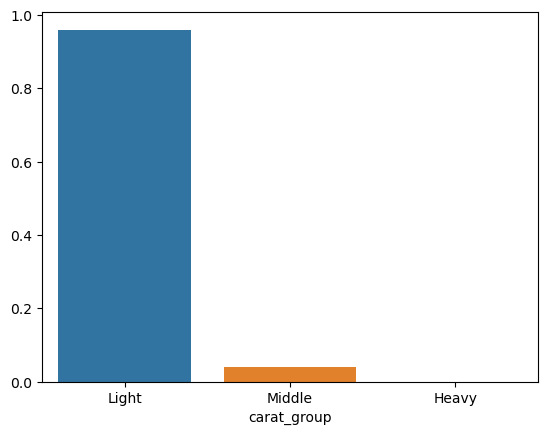

In [17]:
sns.barplot(x = diamonds['carat_group'].value_counts(normalize=True).index, y = diamonds['carat_group'].value_counts(normalize=True).values, )